<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/break_into_tiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyvips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 633 kB 5.2 MB/s 
  Created wheel for pyvips: filename=pyvips-2.2.1-py2.py3-none-any.whl size=54195 sha256=89d779a1a673babcce340528323b5b6e84dbf59d0586ab5c8a9cd8c845b64a7d
  Stored in directory: /root/.cache/pip/wheels/77/42/8a/b1ab7370bfb87f6a4b66a37ed7fcc6d04177a004acadf3ccd5
Successfully built pyvips


In [2]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/

In [3]:
!apt install -y libvips

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'libvips42' instead of 'libvips'
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  firefox fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common libcanberra0 libcfitsio5 libcupsfilters1 libcupsimage2
  libdbus-glib-1-2 libdbusmenu-glib4 libdbusmenu-gtk3-4 libgail-common
  libgail18 libgs9 libgs9-common libgsf-1-114 libgsf-1-common libgsl23
  libgslcblas0 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmatio4 libopenslide0
  liborc-0.4-0 libpoppler-glib8 libtdb1 nip2 poppler-data
  sound-theme-freedesktop xul-ext-ubufox
Suggested packages:
  fonts-lyx fonts-noto ghostscript-x libcanberra-gtk0 libcanberra-pulse
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | 

In [5]:
import pyvips

In [6]:
img=pyvips.Image.new_from_file('/content/drive/MyDrive/dataset/BreCaHAD/Case_1-01.tif')

In [10]:
print(pyvips.Image.new_from_file('/content/drive/MyDrive/dataset/BreCaHAD/Case_1-01.tif',page=0).__getattr__)

<bound method Image.__getattr__ of <pyvips.Image 1360x1024 ushort, 3 bands, rgb16>>


In [13]:
img=pyvips.Image.new_from_file('/content/drive/MyDrive/dataset/BreCaHAD/Case_1-01.tif',page=0)

In [14]:
img

<pyvips.Image 1360x1024 ushort, 3 bands, rgb16>

In [15]:
img.tiffsave('output_image.tiff',tile=True,compression='lzw',bigtiff=True,pyramid=True,Q=80)

In [18]:
x=pyvips.Image.new_from_file('/content/output_image.tiff')

In [26]:
print(pyvips.Image.new_from_file('/content/output_image.tiff',page=4).__getattr__)

<bound method Image.__getattr__ of <pyvips.Image 85x64 ushort, 3 bands, rgb16>>


[0-4] pages

In [29]:
import sys

import pyvips

image=pyvips. Image.new_from_file('/content/output_image.tiff',page=0)

patch_size = 128

n_across =image.width// patch_size

n_down = image.height// patch_size 



#leaving lastpart #leaving lastpart

n_patches = 0 
for y in range(0, n_down):

  #print("row ()...".format(y))

  for x in range(0, n_across): 
    patch=image.crop(x *patch_size, y *patch_size, patch_size ,patch_size)
    n_patches += 1

print("{} patches generated".format(n_patches))

# 3078 patches generated

80 patches generated


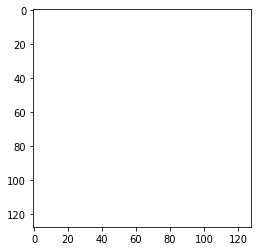

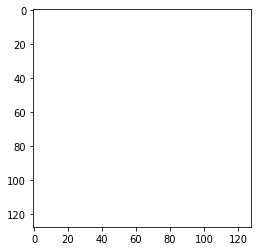

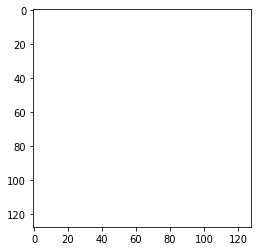

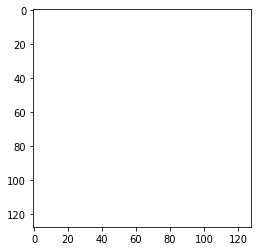

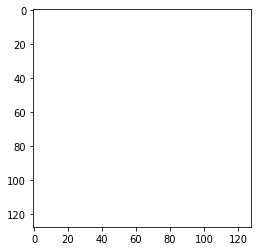

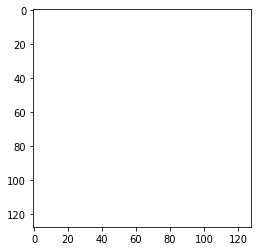

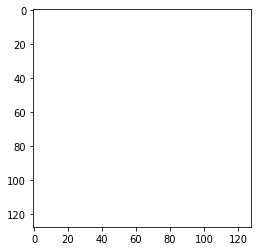

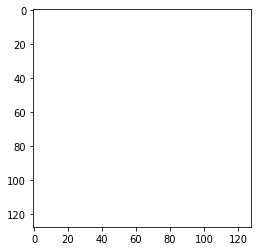

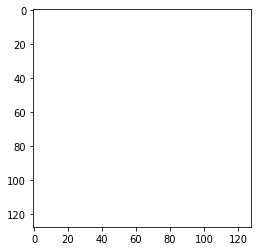

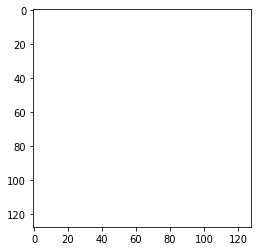

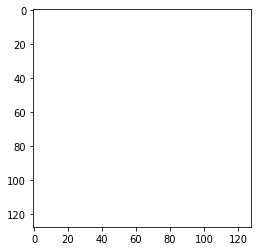

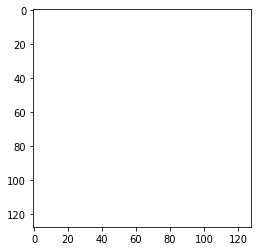

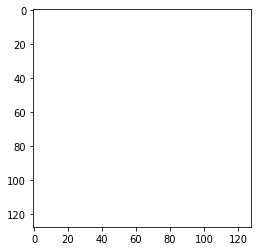

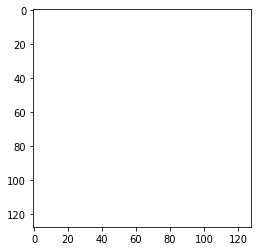

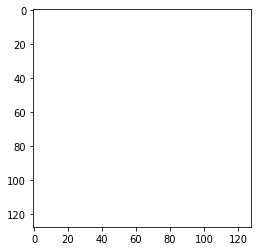

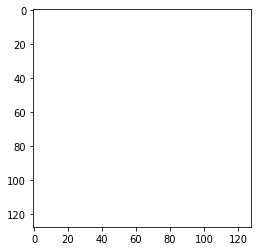

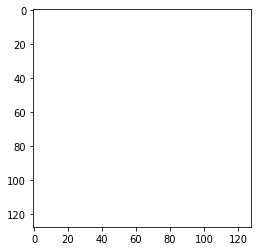

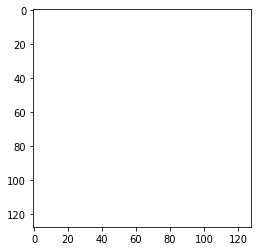

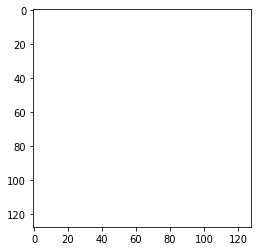

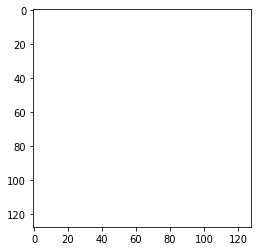

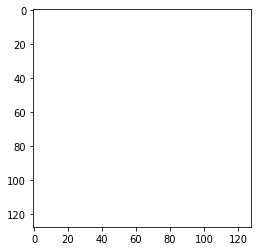

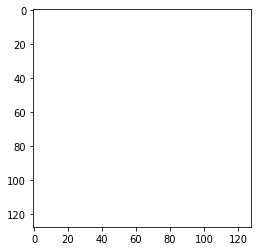

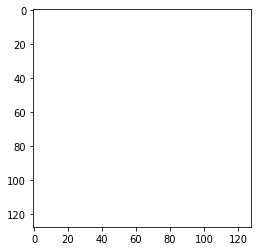

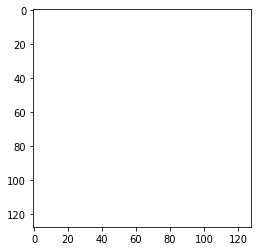

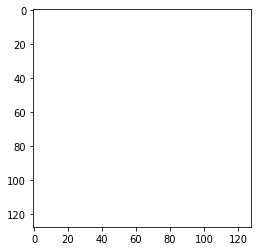

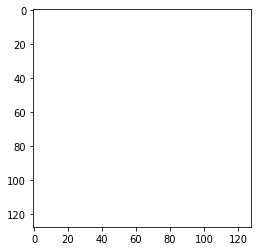

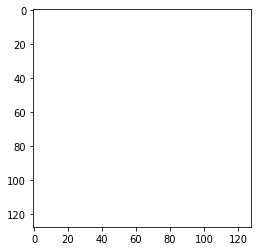

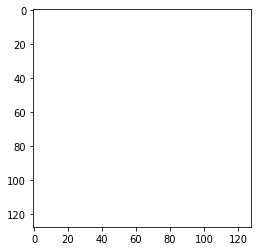

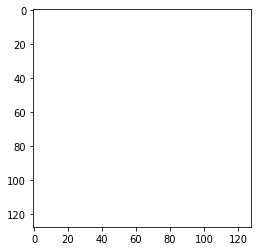

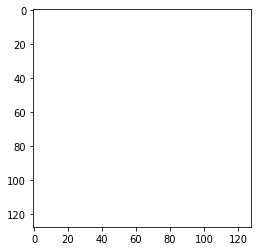

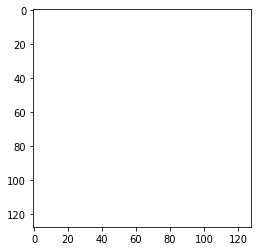

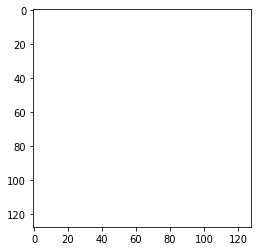

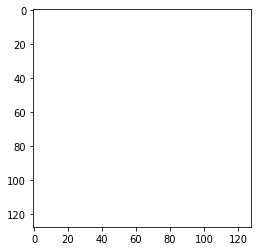

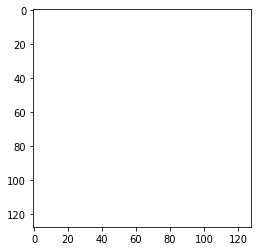

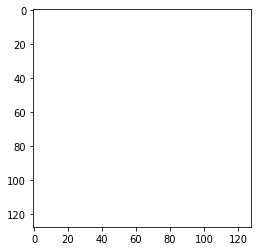

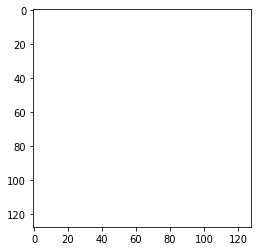

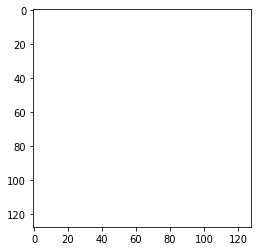

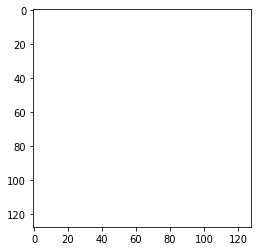

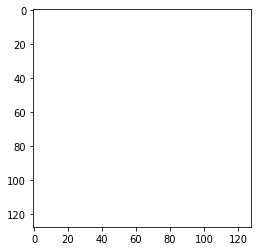

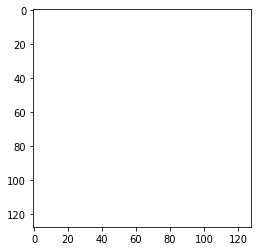

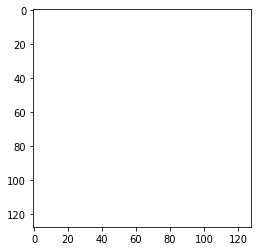

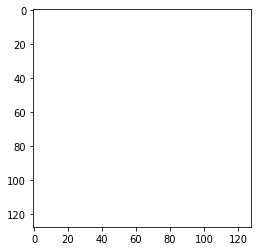

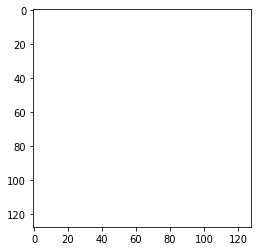

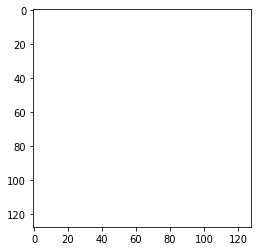

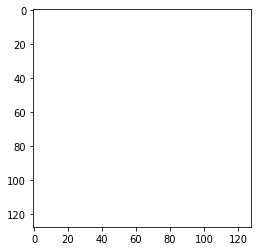

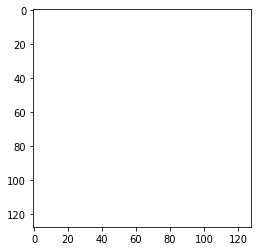

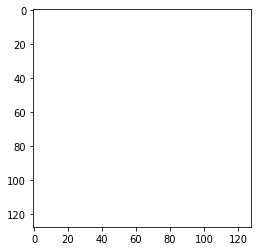

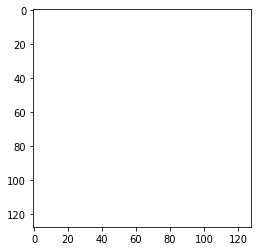

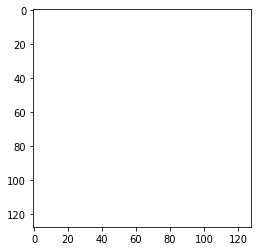

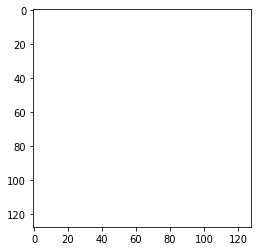

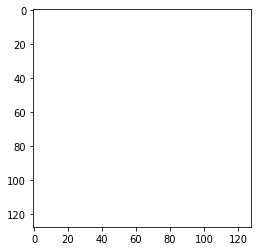

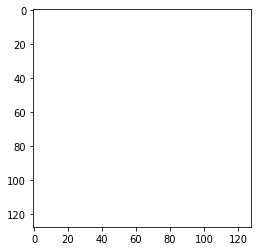

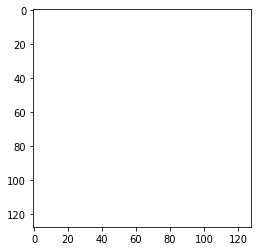

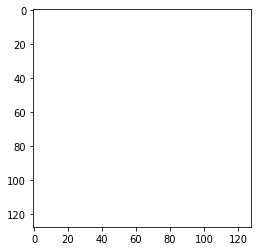

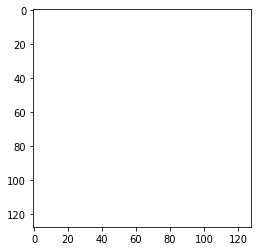

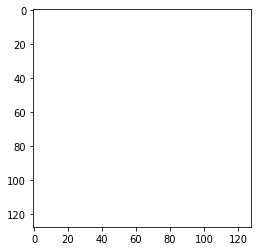

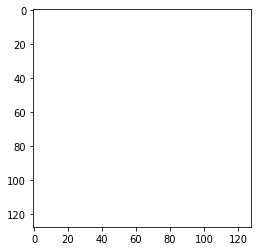

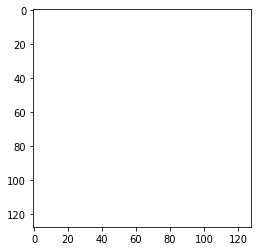

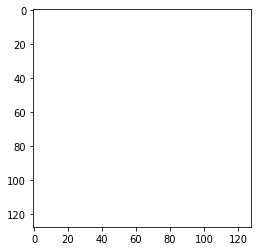

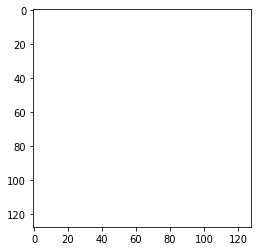

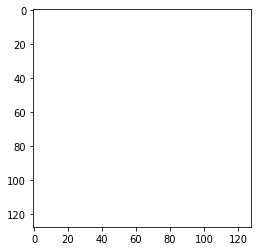

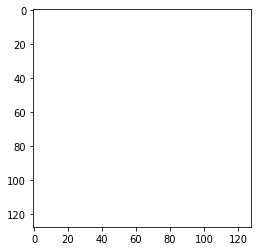

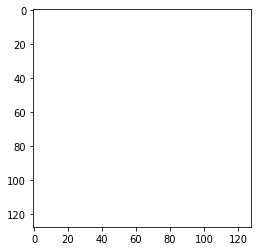

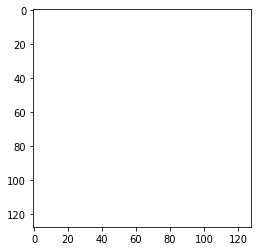

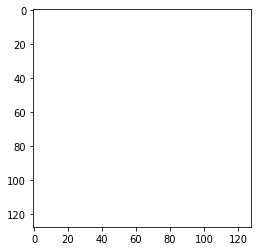

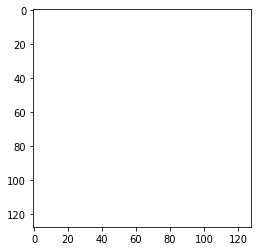

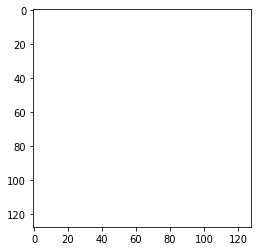

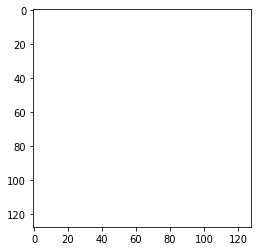

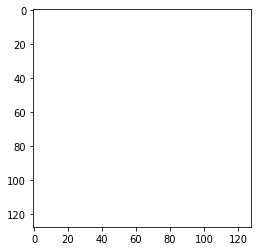

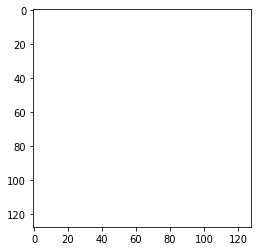

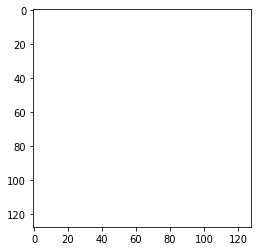

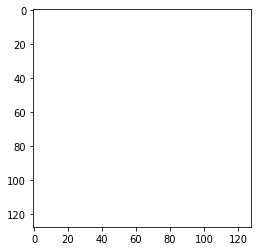

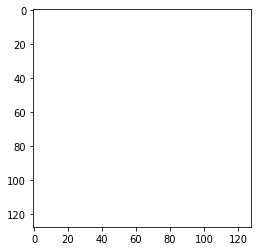

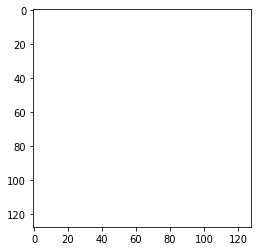

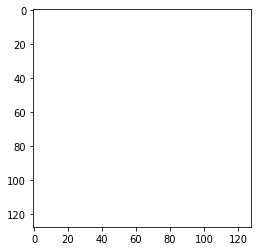

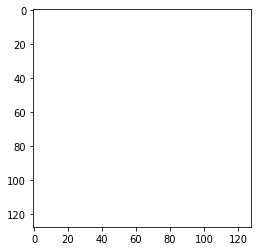

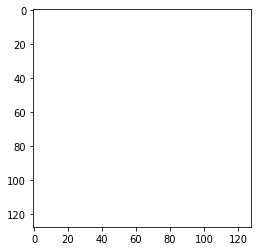

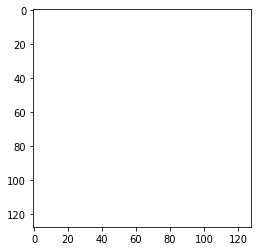

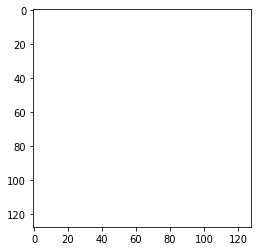

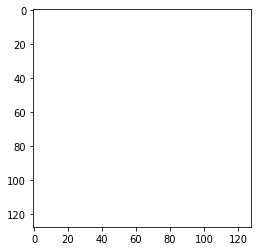

80 patches generated


In [34]:
import sys

import pyvips 

import matplotlib.pyplot as plt

import numpy as np

format_to_dtype={ 
    'uchar': np.uint8,

    'char': np.int8, 
    'ushort': np.uint16,
    'short': np.int16,

    'uint': np.uint32,

    'int': np.int32,

     'float': np. float32,
     'double': np. float64,

     'complex': np.complex64,

    'dpcomplex': np.complex128,
}

image=pyvips.Image.new_from_file('output_image.tiff',page=0) 
patch_size =128
n_across = image.width // patch_size #leaving lastpart

n_down = image.height // patch_size #leaving lastpart

n_patches =0 

for y in range(0, n_down):

  # print("row ().format(y)) 
  
  for x in range(0, n_across):

    patch = image.crop(x *patch_size, y *patch_size, patch_size, patch_size)

    img=np.ndarray(buffer=patch.write_to_memory(),

                  dtype=format_to_dtype[patch.format],
                   shape=[patch.height, patch.width, patch.bands])

    if np.sum(img) !=200540160: 
      plt.imshow(img)

      plt.show()
      n_patches+=1
print("{} patches generated".format(n_patches))


In [36]:
img=pyvips.Image.new_from_file('/content/output_image.tiff')

In [41]:
img.dzsave('abcdefghi',overlap=0,tile_size=512,depth='one',suffix='.png')